In [1]:
import numpy as np
import pandas as pd
import scipy.io
import os
#import mne
import ieeg_funcs as ief
import dgFuncs as dg
from sklearn import preprocessing
import sys
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ftr_root='/Users/davidgroppe/PycharmProjects/SZR_ANT/FTRS'
sub='NA'
one_sec_path=os.path.join(ftr_root,'PWR',sub)
lag_path=os.path.join(ftr_root,'PWR_3SEC',sub)
if not os.path.isdir(lag_path):
    print('Creating directory: %s' % lag_path)
    os.mkdir(lag_path)

Creating directory: /Users/davidgroppe/PycharmProjects/SZR_ANT/FTRS/PWR_3SEC/NA


In [4]:
for f in os.listdir(one_sec_path):
    print(f)

NA_d1_sz2_bppwr.npz
NA_d1_sz3_bppwr.npz
NA_d1_sz4_bppwr.npz
NA_d1_sz5_bppwr.npz
NA_d2_sz1_bppwr.npz


In [9]:
in_file=os.path.join(one_sec_path,f)
print(in_file)
bro=np.load(in_file)

/Users/davidgroppe/PycharmProjects/SZR_ANT/FTRS/PWR/NA/NA_d2_sz1_bppwr.npz


In [10]:
bro.keys()

['time_wind_sec', 'db_pwr', 'peri_ictal']

In [17]:
# Figure out sampling rate
dlt=bro['time_wind_sec'][1]-bro['time_wind_sec'][0]
wind_hz=1/dlt
lag=3
n_meta_wind=int(lag*wind_hz)
print(n_meta_wind)

30


In [26]:
wind=30
dud=np.arange(wind-n_meta_wind,wind+1)
dud=dud[dud>=0]
print(dud)
blah=np.mean(bro['db_pwr'][:,dud],axis=1)
blah.shape

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


(6,)

In [27]:
n_dim, n_wind=bro['db_pwr'].shape
lag_pwr=np.zeros((n_dim,n_wind))
for wind in range(n_wind):
    use_ids=np.arange(wind-n_meta_wind,wind+1) # avg between lag back and current time point
    use_ids=use_ids[use_ids>=0] # remove any window before beginning of file
    lag_pwr[:,wind]=np.mean(bro['db_pwr'][:,use_ids],axis=1)

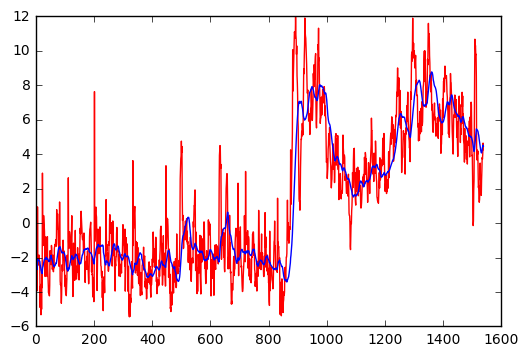

In [33]:
band_id=5
_=plt.plot(bro['db_pwr'][band_id,:],'r-')
_=plt.plot(lag_pwr[band_id,:],'b-')